<a href="https://colab.research.google.com/github/nehaadhikari22/Course-8-Project-/blob/main/Course_8_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Consumer_Complaints.xlsx to Consumer_Complaints.xlsx


In [ ]:
import pandas as pd

# Replace the filename below if it's different
df = pd.read_excel('Consumer_Complaints.xlsx')

# Preview the first few rows
df.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [ ]:
df.dtypes

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

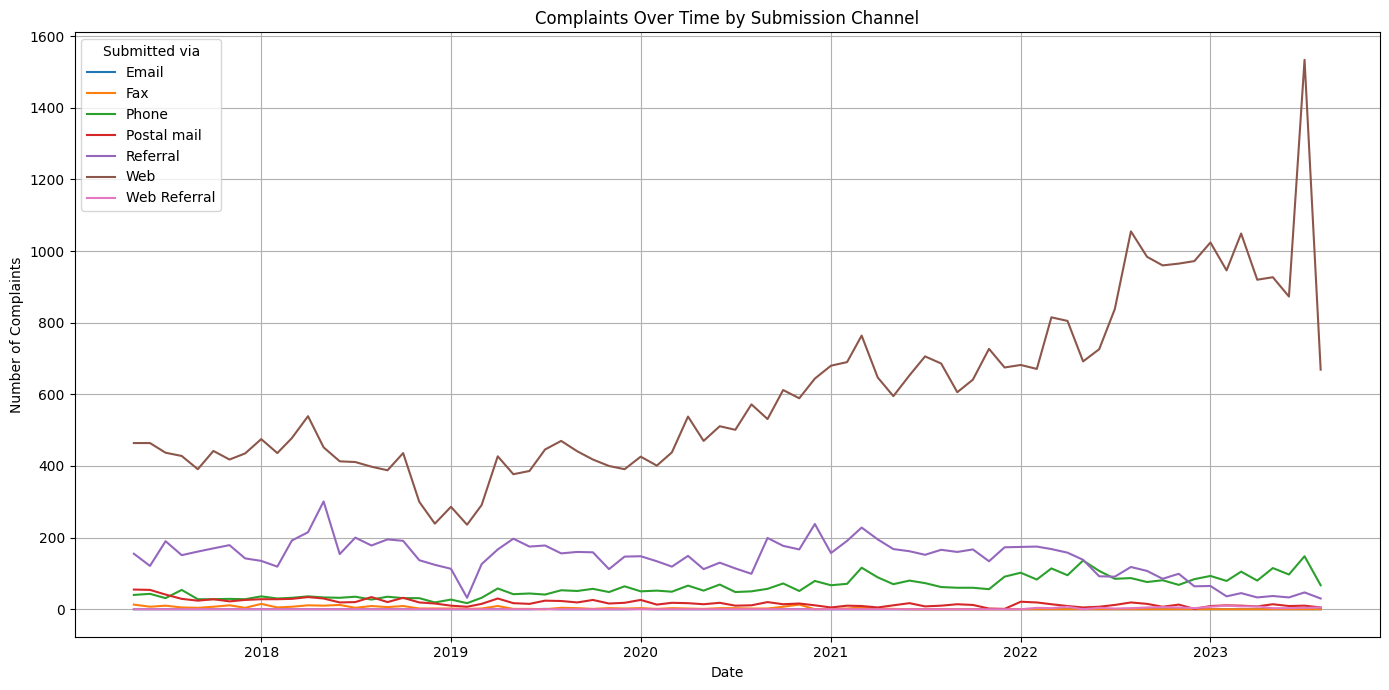

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called df and already loaded

# Convert the 'Date received' column to datetime (in case it's not already)
df['Date received'] = pd.to_datetime(df['Date received'])

# Extract month and year for grouping
df['Month'] = df['Date received'].dt.to_period('M')

# Group by Month and Submitted via, then count complaints
complaints_by_channel = df.groupby(['Month', 'Submitted via']).size().unstack(fill_value=0)

# Convert Period to datetime for plotting
complaints_by_channel.index = complaints_by_channel.index.to_timestamp()

# Plot the line chart
plt.figure(figsize=(14, 7))
for column in complaints_by_channel.columns:
    plt.plot(complaints_by_channel.index, complaints_by_channel[column], label=column)

plt.title('Complaints Over Time by Submission Channel')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.legend(title='Submitted via')
plt.grid(True)
plt.tight_layout()
plt.show()

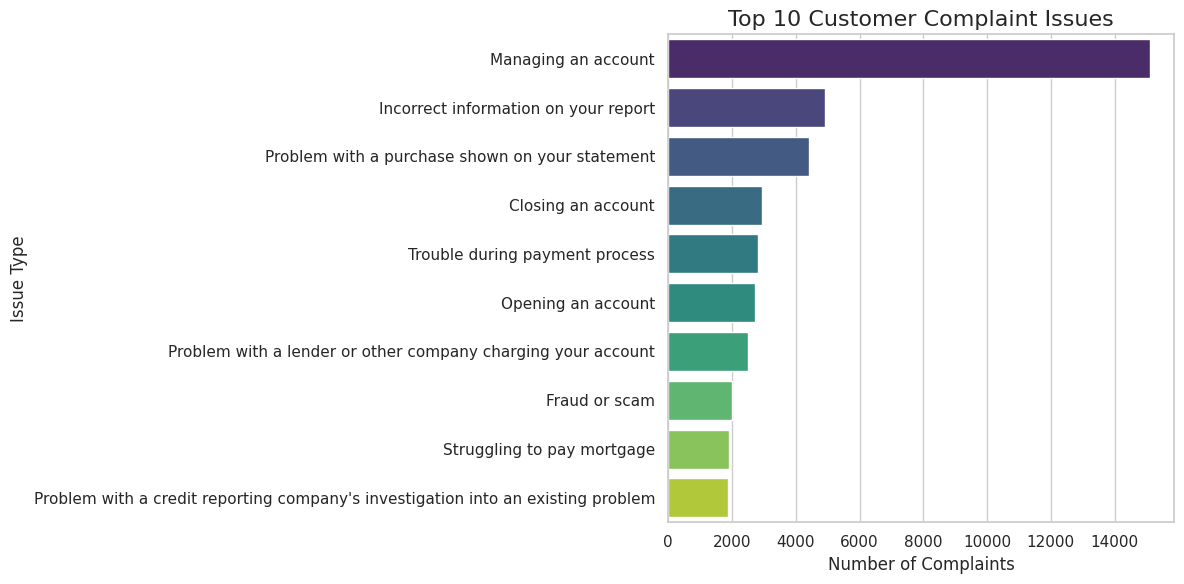

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Preparing the top 10 issues as a DataFrame
issue_counts = df['Issue'].value_counts().head(10)
issue_df = issue_counts.reset_index()
issue_df.columns = ['Issue', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=issue_df,
    x='count',
    y='Issue',
    hue='Issue',
    palette="viridis",
    legend=False
)

plt.title("Top 10 Customer Complaint Issues", fontsize=16)
plt.xlabel("Number of Complaints")
plt.ylabel("Issue Type")
plt.tight_layout()
plt.show()


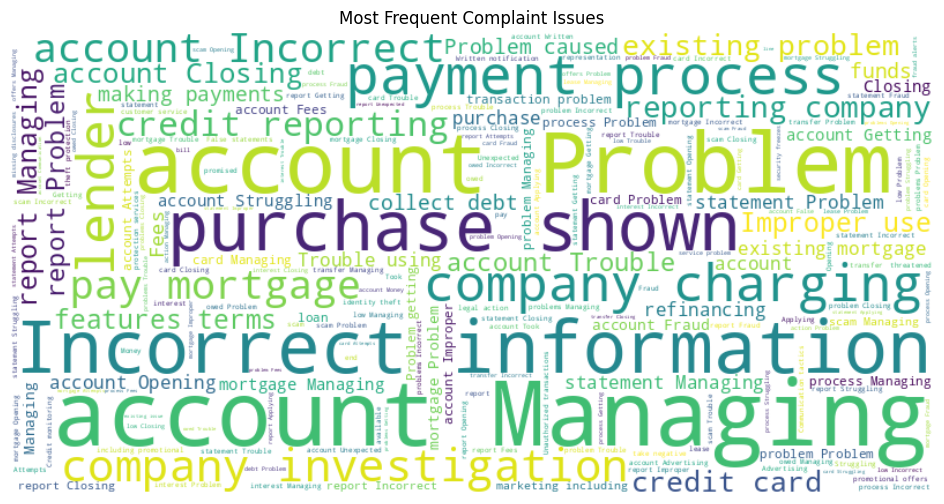

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Issue'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Complaint Issues')
plt.show()

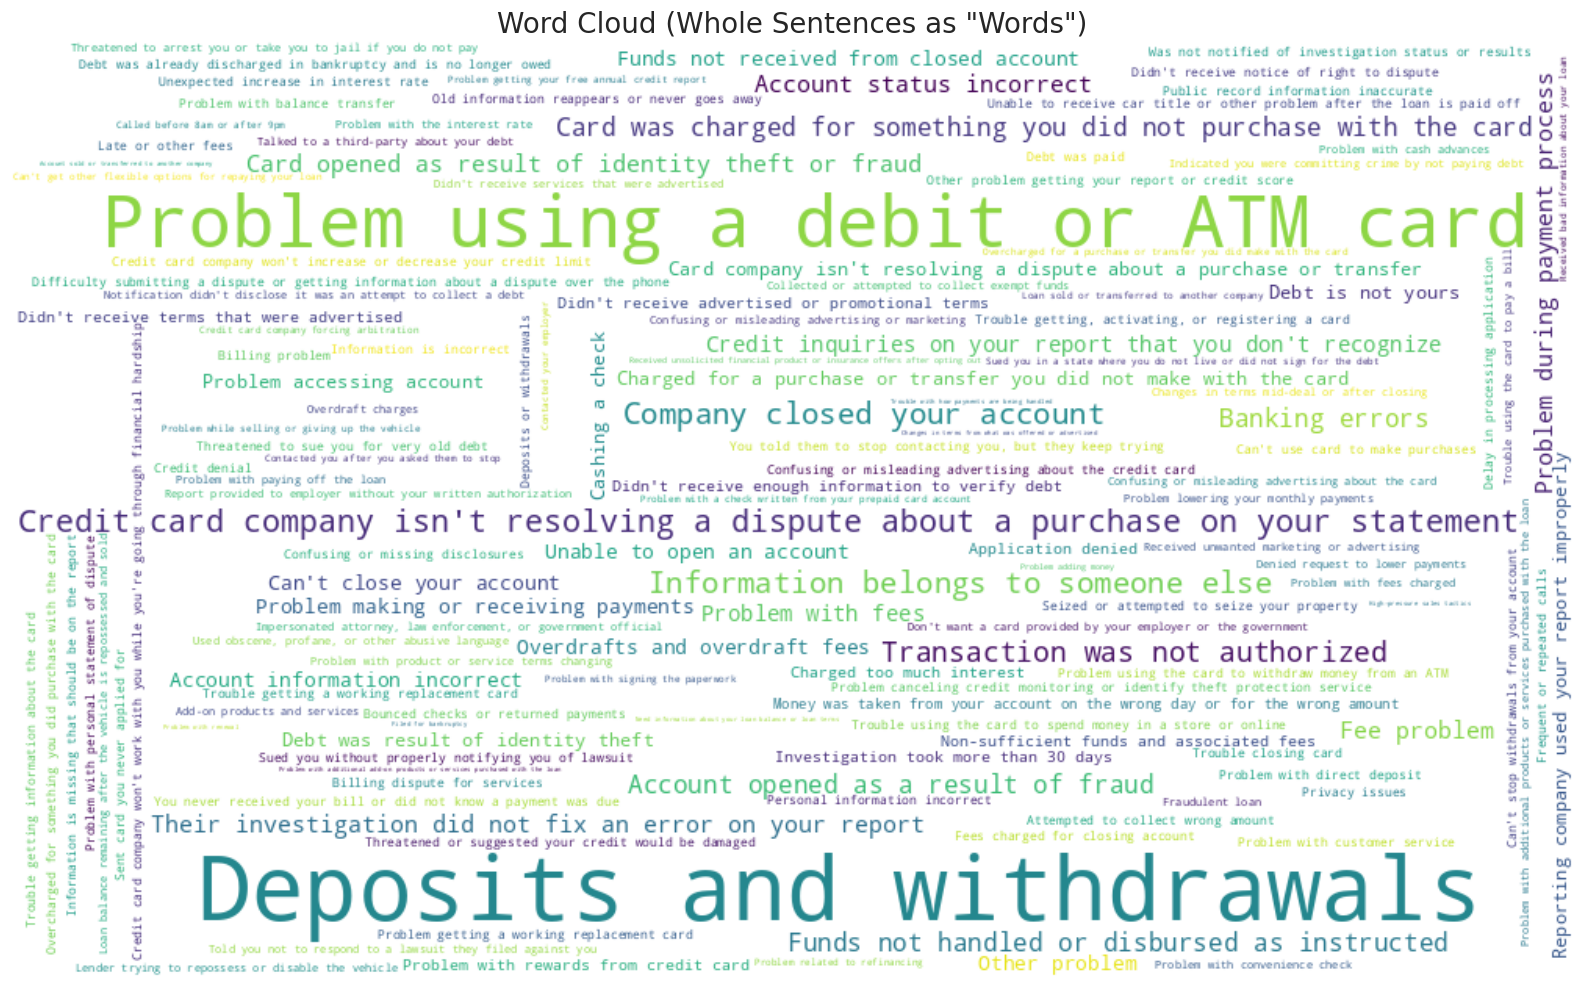

In [ ]:
#Word Cloud Code using Sub-Issue Column with the entire sentence in one cell as one word
# STEP 2: Now read the uploaded file
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
# STEP 3: Treat each full sentence in 'Sub-issue' as a single word
sub_issues = df['Sub-issue'].dropna().astype(str)
frequencies = Counter(sub_issues)

# STEP 4: Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(frequencies)

# STEP 5: Plot it
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Whole Sentences as "Words")', fontsize=20)
plt.tight_layout()
plt.show()

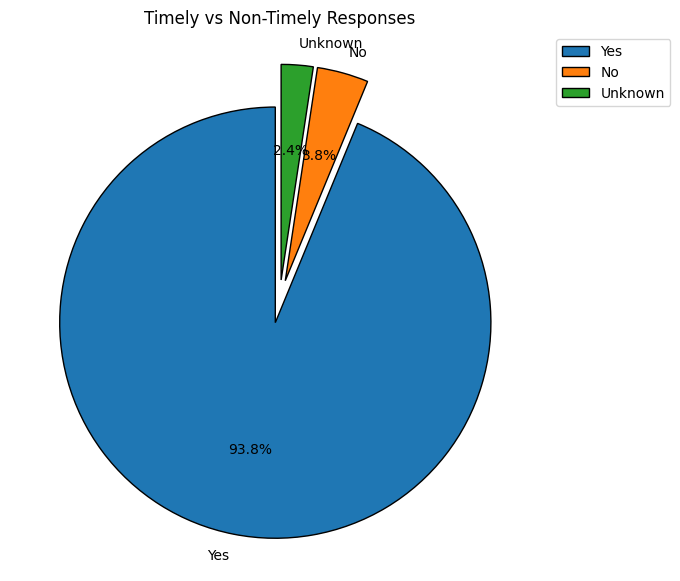

In [ ]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()
df['Timely response?'] = df['Timely response?'].fillna('Unknown')
response_counts = df['Timely response?'].value_counts()
response_counts


import matplotlib.pyplot as plt

# Exploding the segments slightly
explode = (0.1, 0.1, 0.1)  # Separate each slice a little

# Plotting the pie chart with labels and a legend
response_counts.plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     figsize=(7, 7),
                     explode=explode,
                     labels=response_counts.index,
                     wedgeprops={'edgecolor': 'black'})

# Adding title and turning off the default y-axis label
plt.title('Timely vs Non-Timely Responses')
plt.ylabel('')

# Add a legend for better readability
plt.legend(response_counts.index, loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

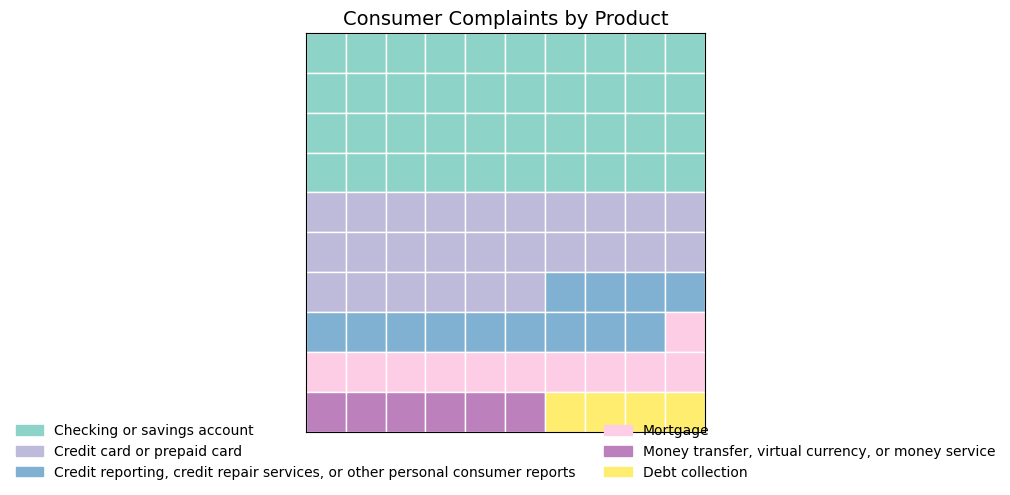

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Top categories (customize as needed)
product_counts = df['Product'].value_counts().head(6)
total = product_counts.sum()

# Configuration
rows = 10
columns = 10
total_tiles = rows * columns

# Scale to 100 tiles
tile_counts = (product_counts / total * total_tiles).round().astype(int)

# Fill grid
waffle_grid = []
for category, count in tile_counts.items():
    waffle_grid.extend([category] * count)

# Pad if less than 100
waffle_grid.extend([''] * (total_tiles - len(waffle_grid)))
waffle_matrix = np.array(waffle_grid).reshape((rows, columns))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(tile_counts)))
color_map = dict(zip(tile_counts.index, colors))

for row in range(rows):
    for col in range(columns):
        label = waffle_matrix[row, col]
        color = color_map.get(label, '#EEEEEE')  # Light grey for empty
        ax.add_patch(plt.Rectangle((col, rows - 1 - row), 1, 1,
                                   facecolor=color, edgecolor='white', linewidth=1))

# Cleanup
ax.set_xlim(0, columns)
ax.set_ylim(0, rows)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Consumer Complaints by Product', fontsize=14)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in tile_counts.index]
plt.legend(handles, tile_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.15),
           ncol=2, frameon=False)

plt.tight_layout()
plt.show()

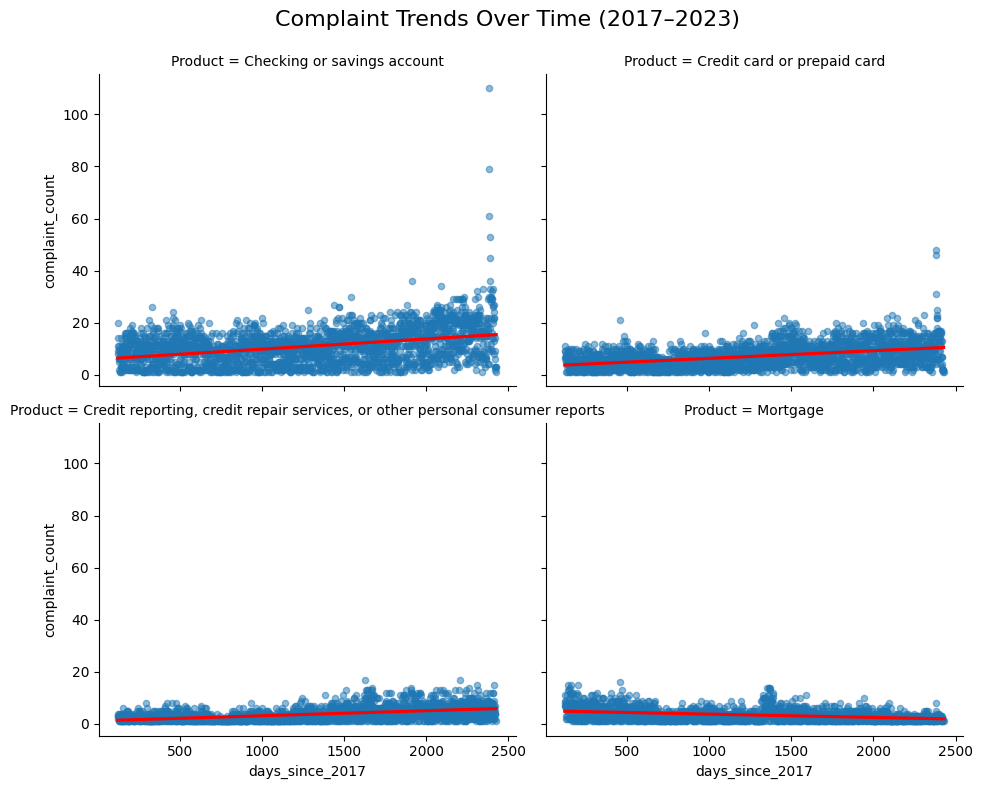

In [ ]:
#use  a regplot to see if complaint volume is increasing/decreasing per top4 products with highest volume of complaints over time
# Convert to datetime
df['Date submitted'] = pd.to_datetime(df['Date submitted'])

# Set base date
base_date = pd.to_datetime('2017-01-01')

# Calculate days since base date
df['days_since_2017'] = (df['Date submitted'] - base_date).dt.days
# Group and count complaints
grouped = df.groupby(['Product', 'days_since_2017']).size().reset_index(name='complaint_count')
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 4 products
top_products = df['Product'].value_counts().head(4).index.tolist()
filtered = grouped[grouped['Product'].isin(top_products)]

# Regression plot (per product)
sns.lmplot(
    data=filtered,
    x='days_since_2017',
    y='complaint_count',
    col='Product',
    col_wrap=2,
    height=4,
    aspect=1.2,
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Complaint Trends Over Time (2017–2023)', fontsize=16)
plt.show()